In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [18]:
# libraries
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns


In [3]:
#Importing Swvl stock market data
start_date = datetime.datetime(2021,3,15)
end_date = datetime.datetime(2022,10,1)

swvl = yf.download('Swvl', start=start_date, 
                      end=end_date, progress=False)
swvl["Date"] = swvl.index
swvl = swvl[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
swvl['Date'] = pd.to_datetime(swvl['Date']).dt.date
swvl.reset_index(drop=True, inplace=True)

swvl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,9.800,10.290,9.80,9.940,9.940,254300
1,2021-03-16,10.380,10.380,9.80,9.840,9.840,246700
2,2021-03-17,9.845,9.850,9.71,9.840,9.840,138600
3,2021-03-18,9.900,9.910,9.75,9.900,9.900,160300
4,2021-03-19,9.900,9.950,9.82,9.910,9.910,26000
...,...,...,...,...,...,...,...
387,2022-09-26,0.773,0.778,0.70,0.750,0.750,353700
388,2022-09-27,0.770,0.810,0.76,0.810,0.810,467200
389,2022-09-28,0.800,0.940,0.77,0.880,0.880,895400
390,2022-09-29,0.871,0.892,0.82,0.851,0.851,310800


In [33]:
#Using Calndlestick to visulaize
figure= go.Figure(data=[go.Candlestick(x=swvl["Date"] ,open=swvl["Open"], 
                                        high=swvl["High"],low=swvl["Low"], close=swvl["Close"])])
figure.update_layout(title="Swvl Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

In [31]:
#Stock Market Analysis with Time Period Selectors
figure = px.line(swvl, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [5]:
#visualize the close prices of Swvl’s stock using a bar plot 
figure = px.bar(swvl, x = "Date", y= "Close")
figure.show()

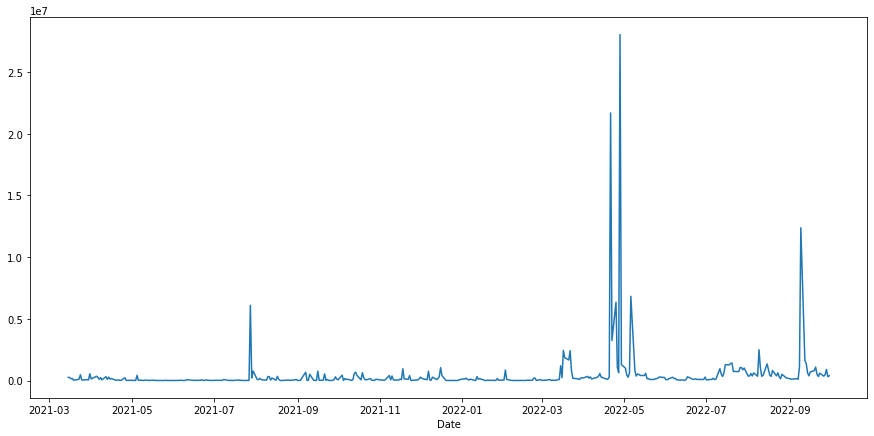

In [6]:
#visualize the Volume of Swvl’s stock using a normal plotting
swvl.set_index('Date')['Volume'].plot(figsize=(15,7))

In [7]:
#swvl.ilock[250:350]['Volume'].plot()
swvl['Total traded']= swvl['Open'] * swvl['Volume']
swvl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total traded
0,2021-03-15,9.800,10.29,9.80,9.94,9.94,254300,2.492140e+06
1,2021-03-16,10.380,10.38,9.80,9.84,9.84,246700,2.560746e+06
2,2021-03-17,9.845,9.85,9.71,9.84,9.84,138600,1.364517e+06
3,2021-03-18,9.900,9.91,9.75,9.90,9.90,160300,1.586970e+06
4,2021-03-19,9.900,9.95,9.82,9.91,9.91,26000,2.574000e+05


Text(0, 0.5, 'Total Traded Amounts')

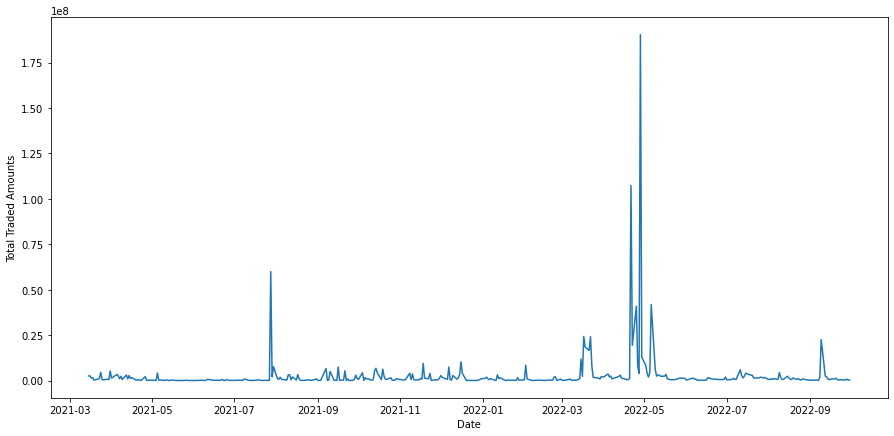

In [8]:
swvl.set_index('Date')['Total traded'].plot(figsize=(15,7))
plt.ylabel('Total Traded Amounts')

In [9]:
# Max Total Trade   
swvl['Total traded'].argmax()

284

In [10]:
# Show the date of the max total trade
swvl.iloc[[swvl['Total traded'].argmax()]]

,Date,Open,High,Low,Close,Adj Close,Volume,Total traded
284,2022-04-28,6.79,11.4,6.79,10.09,10.09,28038900,1.903841e+08


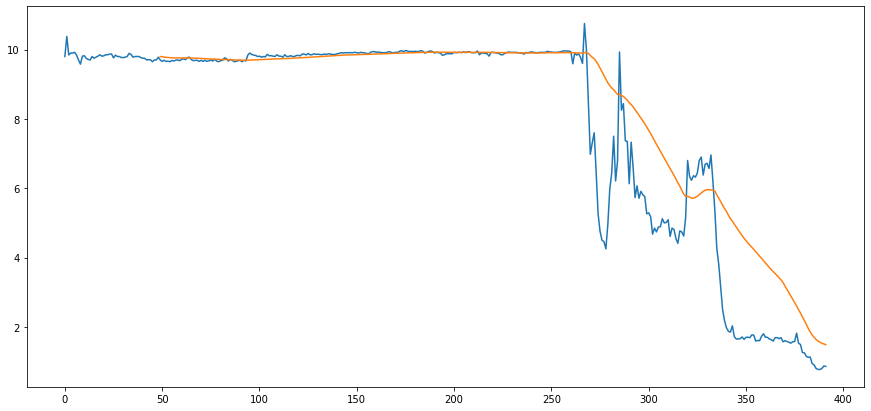

In [11]:
# Moving Average Line
swvl['Open'].plot(figsize=(15,7))
swvl['MA50']=swvl['Open'].rolling(50).mean()
swvl['MA50'].plot(Label='MA50')

In [12]:
# Correlation
corr = pd.concat([swvl['Open'],swvl['Close']], axis = 1)
corr.columns=['Swvl Open','Swvl Close']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce9fb5a950>,
      dtype=object)

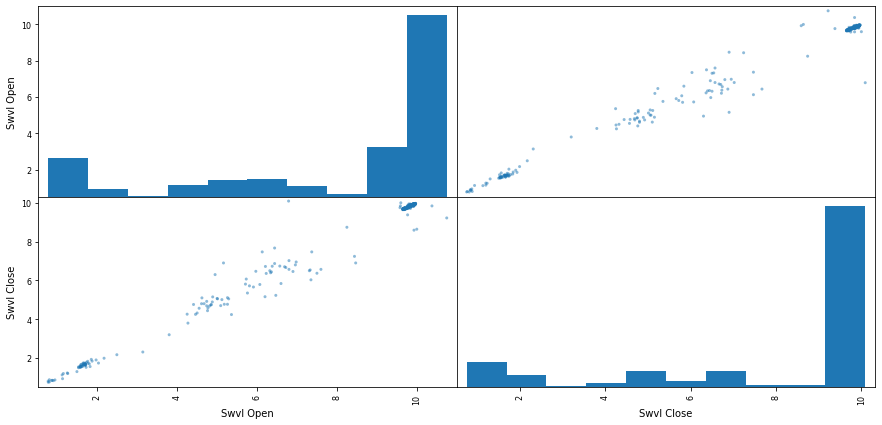

In [34]:
scatter_matrix(corr,figsize=(15,7))
#, hist_kwds = {'bins':50}

# Daily Percentage Change
- $r_{t}$ = $p_{(t)}$ / $p_{(t-1)}$ $-1$

In [14]:
#First returns is NAN because it is the first daغ and there is no day before to divide to 
swvl['returns']= (swvl['Close'] / swvl['Close'].shift(1))  - 1
swvl .head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total traded,MA50,returns
0,2021-03-15,9.800,10.29,9.80,9.94,9.94,254300,2.492140e+06,NaN,NaN
1,2021-03-16,10.380,10.38,9.80,9.84,9.84,246700,2.560746e+06,NaN,-0.010060
2,2021-03-17,9.845,9.85,9.71,9.84,9.84,138600,1.364517e+06,NaN,0.000000
3,2021-03-18,9.900,9.91,9.75,9.90,9.90,160300,1.586970e+06,NaN,0.006098
4,2021-03-19,9.900,9.95,9.82,9.91,9.91,26000,2.574000e+05,NaN,0.001010


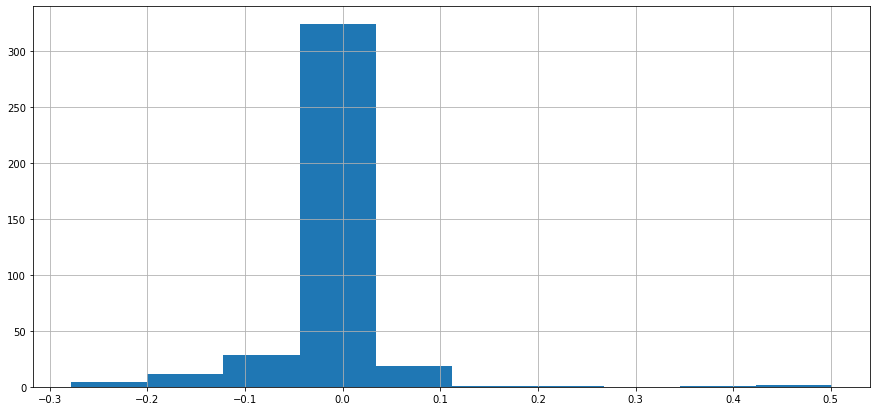

In [36]:
# Plot the returns distribution
swvl['returns'].hist(figsize=(15,7))

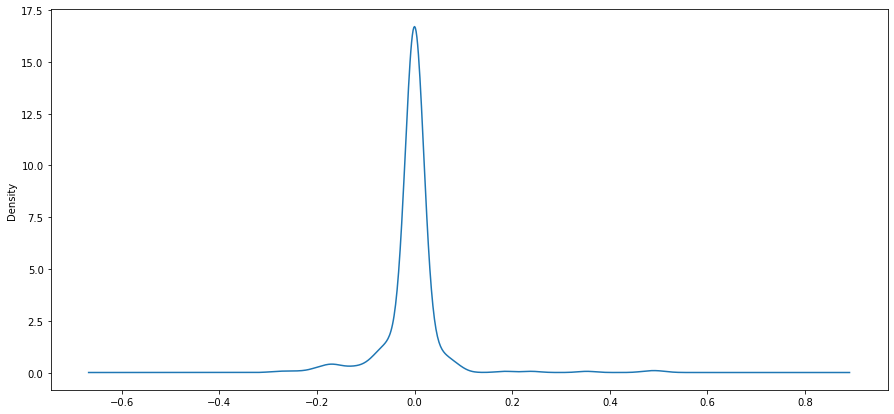

In [37]:
swvl['returns'].plot(kind='kde', label='Swvl',figsize=(15,7))

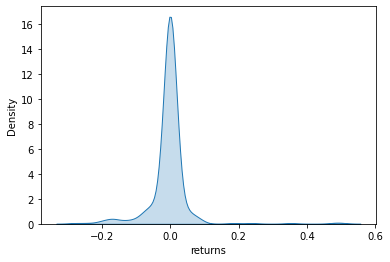

In [20]:
#You can plot kde with matplotlib or seaborn, Doesn't matter .
sns.kdeplot(swvl.returns, shade= True)

- That is reflect only the standard deviation of the values: meaning how far every value from the mean, It's almost normal distribtion focusing in spacfic value.
- Visualing the kde make us represents the data using a continuous probability density curve in one or more dimensions.

# Cumulative Return

In [22]:
swvl['Cumulative Return']=(1 + swvl['returns']).cumprod()
swvl .head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total traded,MA50,returns,Cumulative Return
0,2021-03-15,9.800,10.29,9.80,9.94,9.94,254300,2.492140e+06,NaN,NaN,NaN
1,2021-03-16,10.380,10.38,9.80,9.84,9.84,246700,2.560746e+06,NaN,-0.010060,0.989940
2,2021-03-17,9.845,9.85,9.71,9.84,9.84,138600,1.364517e+06,NaN,0.000000,0.989940
3,2021-03-18,9.900,9.91,9.75,9.90,9.90,160300,1.586970e+06,NaN,0.006098,0.995976
4,2021-03-19,9.900,9.95,9.82,9.91,9.91,26000,2.574000e+05,NaN,0.001010,0.996982


(array([737850., 737911., 737972., 738034., 738095., 738156., 738215.,
        738276., 738337., 738399.]),
 <a list of 10 Text major ticklabel objects>)

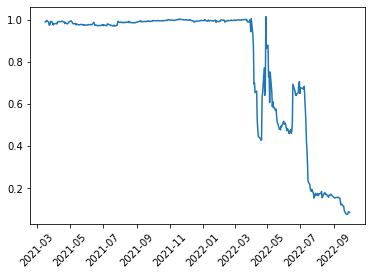

In [39]:
plt.plot(swvl['Date'],swvl['Cumulative Return'])
plt.xticks(rotation = 45) 